In [81]:
import pandas as pd
import spacy
from spacy import displacy
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
NER = spacy.load("en_core_web_sm")

In [69]:
df = pd.read_csv('../../datasets/train.csv', encoding="latin-1")
df = df.head(10000)

In [70]:
df.dtypes

Column1                int64
CPSC_Case_Number     float64
Treatment_Date        object
Age                    int64
Sex                    int64
Race                 float64
Other_Race            object
Hispanic             float64
Body_Part            float64
Diagnosis            float64
Other_Diagnosis       object
Body_Part_2          float64
Diagnosis_2          float64
Other_Diagnosis_2    float64
Disposition          float64
Location             float64
Fire_Involvement     float64
Alcohol              float64
Drug                 float64
Product_1            float64
Product_2            float64
Product_3            float64
Narrative             object
Stratum               object
PSU                  float64
Weight               float64
dtype: object

In [71]:
def sentence_concatination(df):
    sent = ""
    for item in df["Narrative"]:
        sent = sent + str(item)
    return sent

In [72]:
result = sentence_concatination(df)
result = result.lower()

In [73]:
text1 = NER(result)

In [74]:
for word in text1.ents:
    print(word.text,word.label_)

25yom CARDINAL
dislocaton PERSON
lac finger-4 PERSON
px ORG
33yof CARDINAL
shoulder.77yof slipped & fell ORG
4th ORDINAL
season last few weeks DATE
21 CARDINAL
dx headache PERSON
20yof CARDINAL
12 CARDINAL
11 cm QUANTITY
two CARDINAL
tonight TIME
p.e. GPE
cont head PERSON
6 days DATE
the beach 6 days ago DATE
folliculitis19 CARDINAL
8 CARDINAL
dxl tibia PERSON
36yof CARDINAL
10 CARDINAL
30mph QUANTITY
3 CARDINAL
anle PERSON
4 cm QUANTITY
2 CARDINAL
home & slipped & fell ORG
pavement & fell ORG
1 CARDINAL
last 2 months DATE
2 months ago DATE
cardiac ORG
syncope13 GPE
2 days DATE
walking52 PERSON
lac12yof PERSON
head injury-dizzy PERSON
about 6 feet QUANTITY
65yof CARDINAL
5 weeks DATE
49 CARDINAL
yesterday DATE
today DATE
fell & bent ORG
sp78yf ORG
hand20yo ORG
last week DATE
7 CARDINAL
26yom CARDINAL
fx ORG
57 CARDINAL
radius29 NORP
4th ORDINAL
4th ORDINAL
4 CARDINAL
2 days ago DATE
7yof CARDINAL
hematoma91yof ORG
toe painrib fx ORG
70yof CARDINAL
hematoma86 PERSON
last night TIME
stra

In [75]:
displacy.render(text1,style="ent",jupyter=True)

In [76]:
def extract_entity(text, column_filter):
    result = []
    for word in text.ents:
        #print(word.text,word.label_)
        if word.label_ == column_filter:
            result .append(word.text)
    return result

In [90]:
times = extract_entity(text1, "DATE")
times = ''.join(str(times).split("'"))
times

'[season last few weeks, 6 days, the beach 6 days ago, last 2 months, 2 months ago, 2 days, 5 weeks, yesterday, today, last week, 2 days ago, strain4 month old, 2 days ago, yesterday, today, 1hr, 2 weeks, intox19 month old, 2 days ago, yesterday, today, fall16 yof c/o, 10x, today, 2 days ago, a few days ago, eyebrow*42yom, today, 3 days ago, weeks ago, 1 day, yesterday, two weeks, x3 days, 3 days ago, 5 days ago, today, 4 days, two days ago, day, 2 months, 80yof, yesterday, 2nd, 3 days, yesterday, 3 days ago, 3 days ago, laceration@9yom-3 days ago, 2 days ago, yesterday, 2 days ago, today, today, marathon 2wk ago, yesterday, today, yesterday, chi18-yof, a step>>sprain15 month old, yesterday, a few days ago, 20214, 20yof, fx38, l hip.12yom lac, today, today, 2 weeks, 2 weeks ago, month, a few days ago, 1 day ago, 4 days ago, 2 days ago, 3 days ago, 2     days ago, christmas, 2 days ago, 3wks ago, 1 day, street&hyperextended elbow>>sprain21 yof, 1350, last week, several days earlier, two

In [91]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(times)

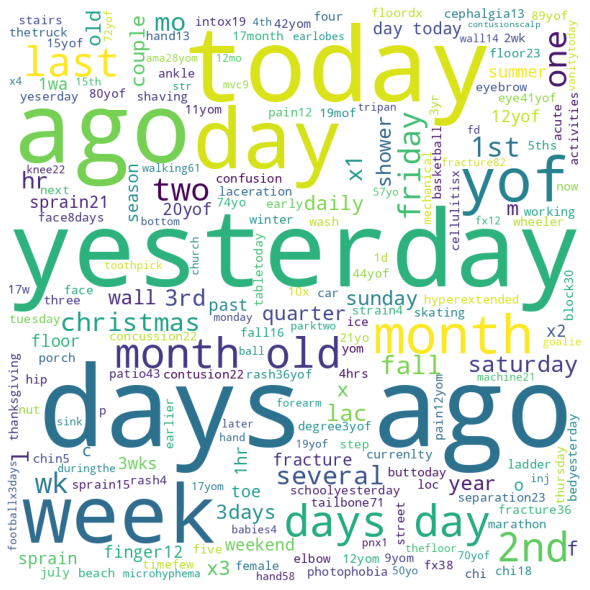

In [92]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()